# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

#creating an extra copy
df3=df

# Print the first five rows of df
df.head()



(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [41]:
# use the function/method (?) describe
df.describe(include ='all')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
count,197625,197625,197625,197625,197625,197625,197625,197625,197625,1.976250e+05,1.976250e+05
unique,721,456,218,373,113,6,7,12190,2,NaN,NaN
top,PTH22,R549,00-00-00,FULTON ST,1,IRT,08/28/2018,00:00:00,REGULAR,NaN,NaN
freq,1800,2861,18816,4080,24092,72198,28772,16893,196675,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.008664e+07,3.274210e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.071853e+08,1.907195e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.912700e+05,2.364400e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.507222e+06,1.404800e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.965458e+06,4.809089e+06


Rename all the columns to lower case: 

In [43]:
# Rename all the columns to lower case
#  first way to do it:

# df.columns
# s='BAbF'
# s.lower()
# type(df.columns)

df.columns=df.columns.map(lambda x:x.lower())

df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [17]:
# Second way to do it
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [23]:
# Change the index to 'linename'
df.linename
df['linename']
df.head(3)
df2=df.set_index('linename')
print ( df.head(3), df2.head(3))

    c/a  unit       scp station linename division        date      time  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  08:00:00   

      desc  entries  \
0  REGULAR  6736067   
1  REGULAR  6736087   
2  REGULAR  6736105   

   exits                                                                 
0                                            2283184                     
1                                            2283188                     
2                                            2283229                                 c/a  unit       scp station division        date      time  \
linename                                                                
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  00:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  04:00:00   
NQR456W   A002  R0

In [44]:
# The next few box are meant to remove all the extra spaces at the end of the column names
st='blabla     '
st.strip()

'blabla'

In [45]:
df.columns= [col.strip() for col in df.columns]
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [46]:
# Now back to indexing with linename column
df2=df.set_index('linename')
print ( df.head(3),'\n','\n', df2.head(3))

    c/a  unit       scp station linename division        date      time  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  08:00:00   

      desc  entries    exits  
0  REGULAR  6736067  2283184  
1  REGULAR  6736087  2283188  
2  REGULAR  6736105  2283229   
 
            c/a  unit       scp station division        date      time  \
linename                                                                
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  00:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  04:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  08:00:00   

             desc  entries    exits  
linename                             
NQR456W   REGULAR  6736067  2283184  
NQR456W   REGULAR  6736087  2283188  
NQR456W   REGULAR  6736105  2283229  


Reset the index: 

In [47]:
# Reset the index
df2 = df2.reset_index()
df2.head()


,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [72]:
# Add a new 'num_lines' column
# need to count the characters in column 'linename'

# print(st,'.')
# len(st.strip())

# st2= 234
# type(st2)
# st2=str(st2)
# type(st2)

# df['linename'].dtype

df['Num_Lines']=df['linename'].map( lambda x: len( str(x).strip() ))
print(df.head(),'\n')
print(df.tail())

    c/a  unit       scp station linename division        date      time  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  16:00:00   

      desc  entries    exits  Num_Lines  
0  REGULAR  6736067  2283184          7  
1  REGULAR  6736087  2283188          7  
2  REGULAR  6736105  2283229          7  
3  REGULAR  6736180  2283314          7  
4  REGULAR  6736349  2283384          7   

          c/a  unit       scp        station linename division        date  \
197620  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  08/31/2018   
197621  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  08/31/2018   
197622  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RI

Write a function to clean column names: 

In [79]:
df3.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [80]:
df3.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [81]:
# already done that above
# going back to old version of df: df3
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip()
    return cleaned

In [88]:
# Use the above function to clean the column names
df3.columns = df3.columns.map(clean)


In [89]:
# Check to ensure the column names were cleaned
df3.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [148]:

# df.head()
# df.columns

# Convert the data type of the 'date' column to a date
df['DATE']=pd.to_datetime(df['DATE'])

df.dtypes

# Add a new column 'day_of_week' that represents the day of the week 
df['day']=df['DATE'].dt.day_name()
df['day_of_week']=df['DATE'].dt.dayofweek

df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,day,day_of_week
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,Saturday,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,Saturday,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,Saturday,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,Saturday,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2018-08-31,05:00:00,REGULAR,5554,348,Friday,4
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2018-08-31,09:00:00,REGULAR,5554,348,Friday,4
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2018-08-31,13:00:00,REGULAR,5554,348,Friday,4
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2018-08-31,17:00:00,REGULAR,5554,348,Friday,4


In [150]:
df['day_of_week'].describe()

count    197625.000000
mean          2.986687
std           1.998664
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: day_of_week, dtype: float64

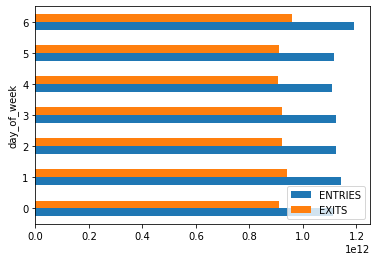

In [152]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [153]:
# Reset the index of grouped
grouped.info
type(grouped)
grouped
grouped2 = grouped.reset_index()
grouped2.columns
# grouped2=grouped2.rename(columns = {'day':'day_of_week'})

grouped2


,day_of_week,ENTRIES,EXITS
0,0,1114237052454,911938153513
1,1,1143313287046,942230721477
2,2,1123655222441,920630864687
3,3,1122723988662,920691927110
4,4,1110224700078,906799065337
5,5,1115661545514,909142081474
6,6,1192306179082,959223750461


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [157]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped2['is_weekend'] = grouped2['day_of_week'].map(weekend_map)
grouped2

,day_of_week,ENTRIES,EXITS,is_weekend
0,0,1114237052454,911938153513,False
1,1,1143313287046,942230721477,False
2,2,1123655222441,920630864687,False
3,3,1122723988662,920691927110,False
4,4,1110224700078,906799065337,False
5,5,1115661545514,909142081474,True
6,6,1192306179082,959223750461,True


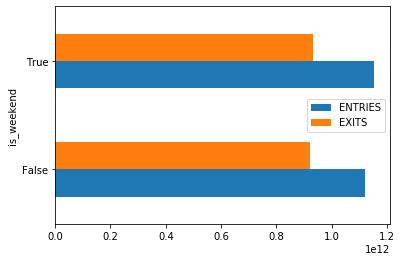

In [173]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
t=grouped2.groupby('is_weekend')

wkend = grouped2.groupby('is_weekend').mean()
wkend
wkend[['ENTRIES', 'EXITS']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [ ]:
# Remove the 'c/a' and 'scp' columns
df = None
df.head(2)

## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Summary

Great! You practiced your data cleanup skills using Pandas.